<a href="https://colab.research.google.com/github/RejwankabirHamim/Machine-Learning-Sessional-/blob/main/K_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data.csv')
X = data['X'].values
Y = data['Y'].values
Z = data['Z'].values
print(data)

     X   Y   Z
0    1   2   3
1    2   3   4
2   10   2   6
3   12  11  13
4    1  14  15
5   12  21   5
6    3   4  10
7   11  13  14
8    5   1   4
9    2   2   2
10  20  10  10
11  18  20  10
12  13  18  13
13  14   4  21


In [ ]:
def initialize_centroids(X, Y, Z, K):
    centroids = []
    j=int(0)
    for i in range(K):
        centroids.append((X[j], Y[j], Z[j]))
        j=j+1
    return centroids

In [ ]:
def assign_clusters(X, Y, Z, centroids):
    clusters = []
    for i in range(len(centroids)):
        clusters.append([])

    for i in range(len(X)):
        point = (X[i], Y[i], Z[i])
        distances = []
        for c in centroids:
             distance = math.sqrt((point[0] - c[0]) ** 2 + (point[1] - c[1]) ** 2  + (point[2] - c[2]) ** 2)
             distances.append(distance)

        min_distance = float('inf')
        nearest_centroid = 0
        for i in range(len(distances)):
            if distances[i] < min_distance:
                min_distance = distances[i]
                nearest_centroid = i

        clusters[nearest_centroid].append(point)

    return clusters

In [ ]:
def update_centroids(clusters):
    centroids = []
    for cluster in clusters:

        sum_x = 0
        sum_y = 0
        sum_z = 0
        for point in cluster:
          sum_x += point[0]
          sum_y += point[1]
          sum_z += point[2]
          centroid_x = sum_x / len(cluster)
          centroid_y = sum_y / len(cluster)
          centroid_z = sum_z / len(cluster)

        centroids.append((centroid_x,centroid_y, centroid_z))
    return centroids

Enter the value of K: 2


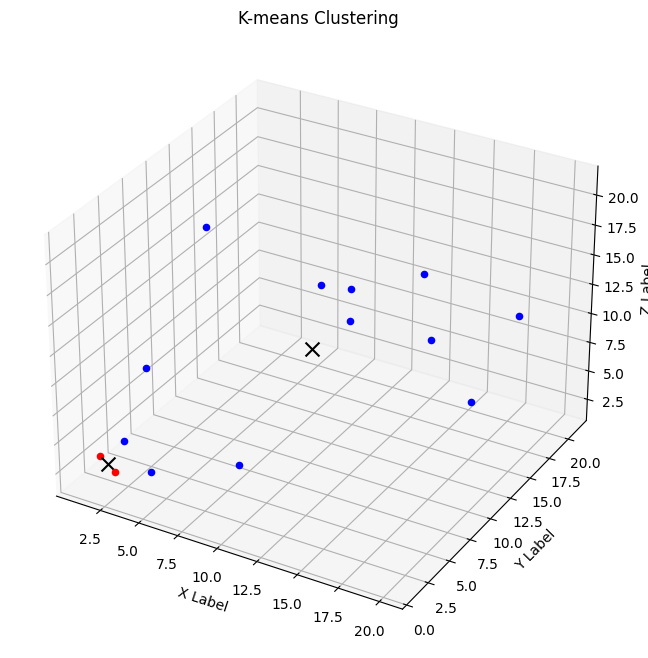

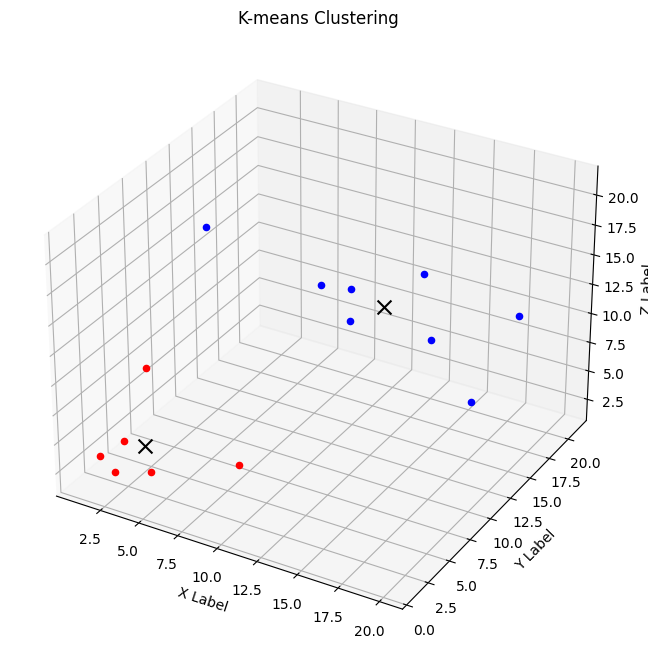

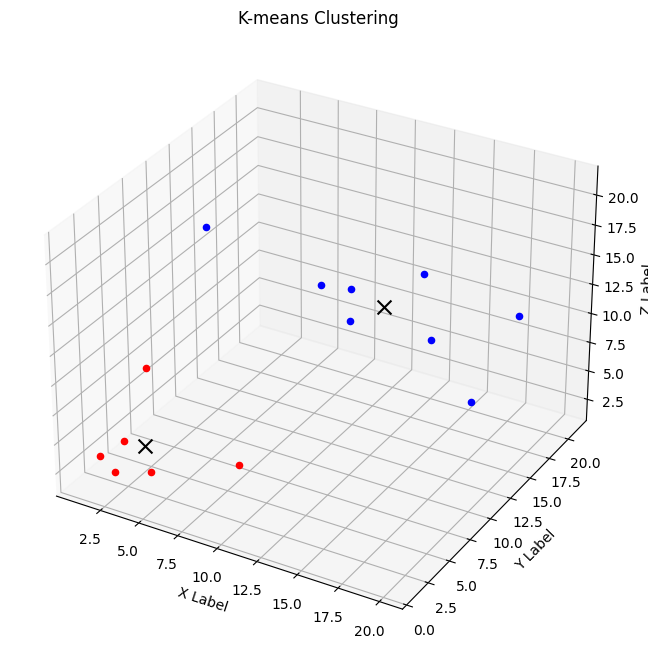

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def k_means_clustering(X, Y,Z, K,centroids):
    prev_centroids = []
    while centroids != prev_centroids:
        clusters = assign_clusters(X, Y, Z, centroids)
        prev_centroids = centroids
        centroids = update_centroids(clusters)
        colors = ['red',  'blue', 'green','yellow',"silver","orange","green","violet","aqua","cyan"]
        fig=plt.figure(figsize=(8, 8))

        counter = 0
        ax = fig.add_subplot(111, projection='3d')
        for cluster in clusters:
            for point in cluster:
                ax.scatter(point[0], point[1],point[2], c=colors[counter], marker='o')
            counter += 1

        for centroid in centroids:
            ax.scatter(centroid[0], centroid[1],centroid[2], c='black', marker='x', s=100)

        ax.set_xlabel('X Label')
        ax.set_ylabel('Y Label')
        ax.set_zlabel('Z Label')
        plt.title('K-means Clustering')
        plt.show()
    return clusters, centroids


K = int(input("Enter the value of K: "))
clusters, centroids = k_means_clustering(X, Y, Z, K)